<a href="https://colab.research.google.com/github/bogatovam/cv-hse/blob/main/CV2_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

1. Чтение изображения

In [2]:
!curl https://raw.githubusercontent.com/bogatovam/cv-hse/main/image.jpg > image.jpg
image_name = 'image.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90202  100 90202    0     0  1190k      0 --:--:-- --:--:-- --:--:-- 1190k


In [3]:
source = cv2.imread(image_name)
img = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

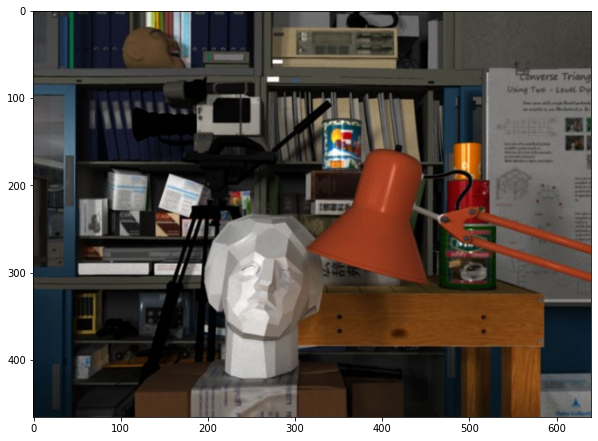

In [4]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
pass

2. Сверточный слой

In [5]:
filters_num = 5
filter_shape = (3,3,3)

filters = []
for i in range(filters_num):
  filters.append(np.random.rand(*filter_shape) * 10)

filters = np.asarray(filters)

In [6]:
filters

array([[[[6.06221093, 8.85300303, 2.09435036],
         [4.83787934, 8.5403705 , 2.2602307 ],
         [4.7356804 , 8.58930667, 3.58996657]],

        [[0.71775414, 2.61837846, 8.81501747],
         [3.72298955, 2.13867515, 0.84405919],
         [7.75929365, 9.41782331, 1.94963759]],

        [[7.80687437, 5.35788854, 5.12663678],
         [5.97728696, 1.76667833, 1.33795887],
         [4.156614  , 3.60263488, 2.37909593]]],


       [[[5.17785396, 3.21105034, 3.71923571],
         [7.26308606, 3.66294   , 8.74085463],
         [1.59929826, 2.77418092, 0.21947618]],

        [[0.51418224, 3.82018057, 9.71660655],
         [4.03398119, 6.0182366 , 3.85816317],
         [7.01627549, 3.46195109, 5.10135905]],

        [[2.3564067 , 0.13608544, 2.15271872],
         [3.85138754, 2.42357399, 5.83142601],
         [2.43429566, 9.69980302, 1.51740264]]],


       [[[8.11695913, 5.76118114, 7.51083928],
         [5.99004556, 1.17106148, 1.72668201],
         [0.46115793, 7.47998409, 7.92077136

In [7]:
n, h, w, c = (1, *img.shape)
fn, fh, fw, fc = filters.shape

h_out = 1 + h - fh
w_out = 1 + w - fw

out = np.zeros((n, fn, h_out, w_out))

for k in range(0, n):
  for m in range(0, fn):
    for x in range(0, h_out):
        for y in range(0, w_out):
            for i in range(0, fh):
              for j in range(0, fw):
                for z in range(0, fc):
                  out[k][m][x][y]+=img[x + i][y + j][z]*filters[m][i][j][z]

In [8]:
tmp_out = out

3. Нормализация

In [9]:
for k in range(0, n):
  for m in range(0, fn):
    flatten_img = np.squeeze(out[k][m])
    out[k][m] = (out[k][m] - np.mean(flatten_img))/np.std(flatten_img)

4. Функция активации RELU

In [10]:
for k in range(0, n):
  for m in range(0, fn):
    out[k][m] = np.maximum(out[k][m], 0)

5. Max Pooling 2x2

In [11]:
ph, pw = (2, 2)
n, fn, h, w = out.shape

h_out = 1 + h - ph
w_out = 1 + w - pw

out_pooling = np.zeros((n, fn, h_out, w_out))

for k in range(0, n):
  for m in range(0, fn):
    for x in range(0, h_out):
        for y in range(0, w_out):
          poolframe = out[k][m][x:x+ph, y:y+pw]
          out_pooling[k][m][x][y] = np.max(poolframe)

out = out_pooling

5. Softmax activation

In [12]:
for k in range(0, n):
  for m in range(0, fn):
    flatten_image = np.squeeze(out[k][m])
    softmax_image = np.exp(flatten_image) / np.sum(np.exp(flatten_image))
    out[k][m] = np.reshape(softmax_image, out[k][m].shape)

In [19]:
for k in range(0, n):
  for m in range(0, fn):
    print(m)
    print(out[k,m])

0
[[1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 1.43279827e-06
  1.43279827e-06 1.43279827e-06]
 [1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 1.43279827e-06
  1.43279827e-06 1.43279827e-06]
 [1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 1.43279827e-06
  1.43279827e-06 1.43279827e-06]
 ...
 [1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 2.41739364e-06
  2.32157061e-06 2.36908351e-06]
 [1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 2.56769366e-06
  2.51649088e-06 2.48426092e-06]
 [1.43279827e-06 1.43279827e-06 1.43279827e-06 ... 3.13123729e-06
  3.08207563e-06 3.03778935e-06]]
1
[[1.40517104e-06 1.40517104e-06 1.40517104e-06 ... 1.40517104e-06
  1.40517104e-06 1.40517104e-06]
 [1.40517104e-06 1.40517104e-06 1.40517104e-06 ... 1.40517104e-06
  1.40517104e-06 1.40517104e-06]
 [1.40517104e-06 1.40517104e-06 1.40517104e-06 ... 1.42003340e-06
  1.42003340e-06 1.40952069e-06]
 ...
 [1.40517104e-06 1.40517104e-06 1.40517104e-06 ... 2.57055935e-06
  2.52374715e-06 2.65375272e